In [1]:
import numpy as num
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns 

In [4]:
file=pd.read_csv(r'Cust_Segmentation.csv')

In [5]:
file.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [6]:
file.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [7]:
file.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [8]:
file.shape

(850, 10)

In [9]:
file.drop_duplicates(subset=["Customer Id","Age","Edu","Years Employed","Income","Card Debt","Other Debt","Defaulted","DebtIncomeRatio"])

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [10]:
file.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [11]:
file['Defaulted'].describe()

count    700.000000
mean       0.261429
std        0.439727
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Defaulted, dtype: float64

In [12]:
file['Defaulted'].fillna(0.261429,inplace=True)

In [13]:
file['Defaulted'].describe()

count    850.000000
mean       0.261429
std        0.398995
min        0.000000
25%        0.000000
50%        0.000000
75%        0.261429
max        1.000000
Name: Defaulted, dtype: float64

In [14]:
file.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

In [15]:
file.drop(file.columns[[8]],axis=1,inplace=True)

In [16]:
file.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [17]:
scale=StandardScaler().fit_transform(file)

In [18]:
file.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.398995,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,0.261429,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [19]:
sse=[]
for k in range (1,50):
    kmeans=KMeans(n_clusters=k,max_iter=300,random_state=0)
    kmeans.fit(scale)
    sse.append(kmeans.inertia_)
    


C:\Users\Aimal Khan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


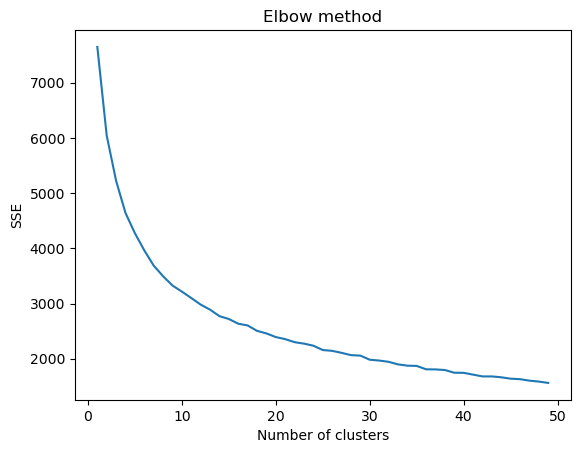

In [20]:
number_clusters=range(1,50)
plt.plot(number_clusters,sse)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [21]:
kmeans=KMeans(n_clusters=20,max_iter=300,random_state=0)
kmeans.fit(scale)

KMeans(n_clusters=20, random_state=0)

In [22]:
file['Cluster']=kmeans.labels_

In [23]:
file.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,10
1,2,47,1,26,100,4.582,8.218,0.0,12.8,13
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,10
4,5,47,1,31,253,9.308,8.908,0.0,7.2,18


In [24]:
file['Cluster'].describe()

count    850.000000
mean       8.350588
std        5.608920
min        0.000000
25%        3.000000
50%        9.000000
75%       13.000000
max       19.000000
Name: Cluster, dtype: float64

In [25]:
file.drop(file.columns[[0,2,3,5,6,7,9]],axis=1,inplace=True)

In [26]:
file.head()

,Age,Income,DebtIncomeRatio
0,41,19,6.3
1,47,100,12.8
2,33,57,20.9
3,29,19,6.3
4,47,253,7.2


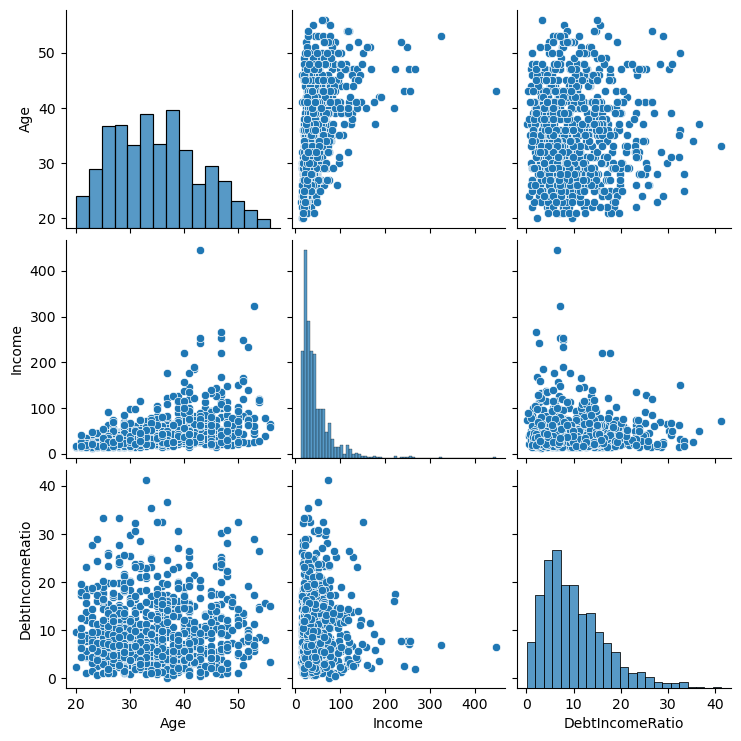

In [27]:
sns.pairplot(file)

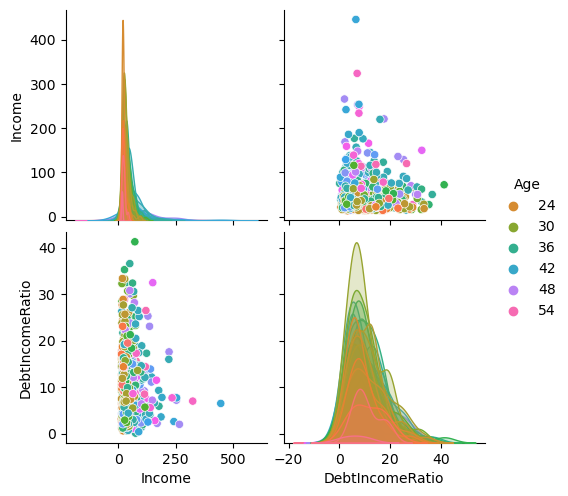

In [28]:
sns.pairplot(file,hue = 'Age',diag_kind = "kde",kind = "scatter",palette = "husl")

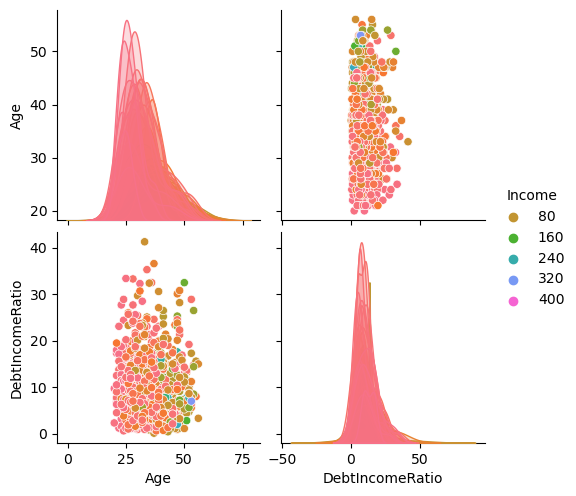

In [29]:
sns.pairplot(file,hue = 'Income',diag_kind = "kde",kind = "scatter",palette = "husl")

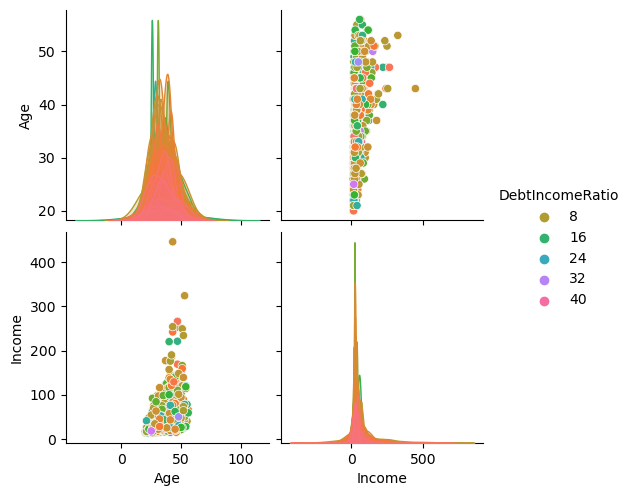

In [30]:
sns.pairplot(file,hue = 'DebtIncomeRatio',diag_kind = "kde",kind = "scatter",palette = "husl")




# Question 1 

# Question 2